In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import os
import random
import torch
from model import ViT16, MobileNetV2, ModelTrainer
import data
from data import TransDataset
import isic2017
import utils

In [2]:
# to reproduce
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

In [3]:
batch_size = 32
img_size = (224, 224)
num_class = 3

df_train = isic2017.get_dataset("train")
df_valid = isic2017.get_dataset("valid")
train_loader = data.get_dataloader(df_train, img_size, batch_size, eval=True)
valid_loader = data.get_dataloader(df_valid, img_size, batch_size, eval=False)

../../dataset/SafeExplain/vit/ created.
Sub folders of ../../dataset/SafeExplain/vit/ was deleted.
Epoch: 0 | Validation Accuracy: 0.5200 | Loss: 1.0930 | F1: 0.2281
Epoch: 1 | Validation Accuracy: 0.5200 | Loss: 1.0371 | F1: 0.2281
Epoch: 2 | Validation Accuracy: 0.5733 | Loss: 0.9360 | F1: 0.3470
Epoch: 3 | Validation Accuracy: 0.6600 | Loss: 0.7887 | F1: 0.5579
Epoch: 4 | Validation Accuracy: 0.6333 | Loss: 0.8615 | F1: 0.5106
Epoch: 5 | Validation Accuracy: 0.6600 | Loss: 0.8421 | F1: 0.5265
Epoch: 6 | Validation Accuracy: 0.6467 | Loss: 0.8522 | F1: 0.5276
Epoch: 7 | Validation Accuracy: 0.7200 | Loss: 0.7102 | F1: 0.6599
Epoch: 8 | Validation Accuracy: 0.6867 | Loss: 0.7518 | F1: 0.5981
Epoch: 9 | Validation Accuracy: 0.6600 | Loss: 0.7543 | F1: 0.5657
Epoch: 10 | Validation Accuracy: 0.6533 | Loss: 0.7770 | F1: 0.5483
Epoch: 11 | Validation Accuracy: 0.6800 | Loss: 0.7383 | F1: 0.5871
Epoch: 12 | Validation Accuracy: 0.7133 | Loss: 0.7094 | F1: 0.6482
Epoch: 13 | Validation Accu

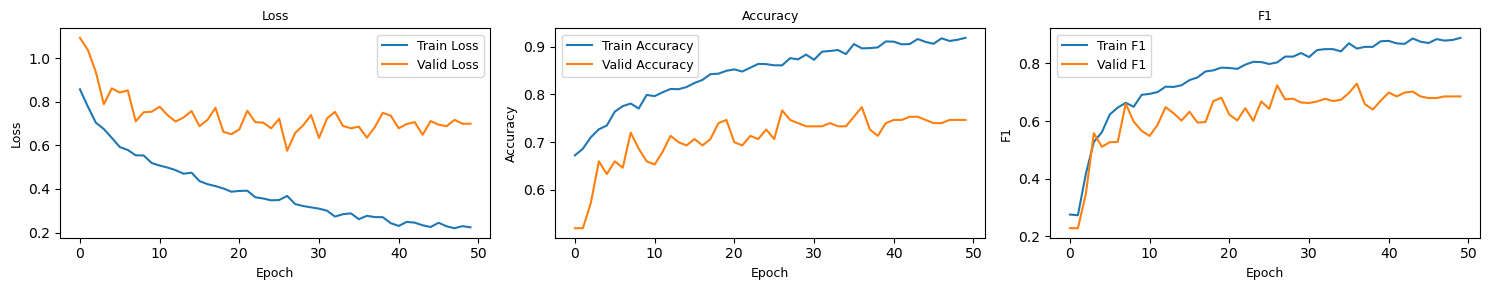

../../dataset/SafeExplain/vit/model_26.pt


In [4]:
num_epochs = 50
lr = 1e-5
warmup_epochs=5

model_save_directory = "../../dataset/SafeExplain/vit/"
utils.create_directory(model_save_directory)
utils.delete_subfolders(model_save_directory)
model = ViT16(num_class)
trainer = ModelTrainer()
best_val_file = trainer.train(model, train_loader, valid_loader, model_save_directory, num_epochs=num_epochs, lr=lr, warmup_epochs=warmup_epochs)

../../dataset/SafeExplain/mobile/ created.
Sub folders of ../../dataset/SafeExplain/mobile/ was deleted.
Epoch: 0 | Validation Accuracy: 0.5600 | Loss: 0.9343 | F1: 0.3519
Epoch: 1 | Validation Accuracy: 0.5667 | Loss: 0.8792 | F1: 0.3619
Epoch: 2 | Validation Accuracy: 0.5600 | Loss: 0.8462 | F1: 0.3431
Epoch: 3 | Validation Accuracy: 0.6333 | Loss: 0.8038 | F1: 0.4832
Epoch: 4 | Validation Accuracy: 0.6333 | Loss: 0.7961 | F1: 0.4805
Epoch: 5 | Validation Accuracy: 0.7000 | Loss: 0.7703 | F1: 0.5928
Epoch: 6 | Validation Accuracy: 0.7200 | Loss: 0.7447 | F1: 0.6315
Epoch: 7 | Validation Accuracy: 0.7133 | Loss: 0.7321 | F1: 0.6203
Epoch: 8 | Validation Accuracy: 0.6933 | Loss: 0.7086 | F1: 0.5940
Epoch: 9 | Validation Accuracy: 0.6867 | Loss: 0.7249 | F1: 0.5842
Epoch: 10 | Validation Accuracy: 0.7000 | Loss: 0.7140 | F1: 0.5969
Epoch: 11 | Validation Accuracy: 0.7133 | Loss: 0.7027 | F1: 0.6149
Epoch: 12 | Validation Accuracy: 0.7333 | Loss: 0.6995 | F1: 0.6375
Epoch: 13 | Validatio

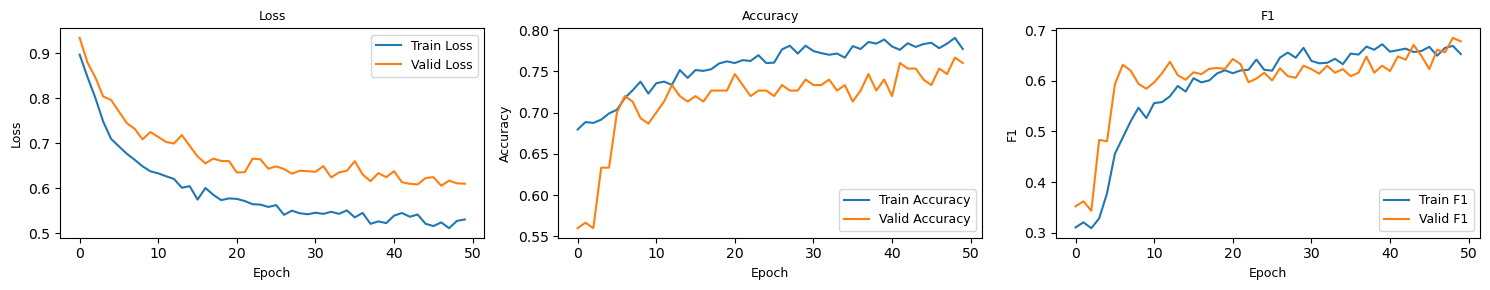

../../dataset/SafeExplain/mobile/model_46.pt


In [5]:
model_save_directory = "../../dataset/SafeExplain/mobile/"
utils.create_directory(model_save_directory)
utils.delete_subfolders(model_save_directory)
model = MobileNetV2(num_class)
trainer = ModelTrainer()
best_val_file = trainer.train(model, train_loader, valid_loader, model_save_directory, num_epochs=num_epochs, lr=lr, warmup_epochs=warmup_epochs)